<a href="https://colab.research.google.com/github/sahiltambe18/DL_CLG/blob/main/Lab1_feedForward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [47]:
train = pd.read_csv("D:\Work\python\dl_clg\datasets\mnistdigit\mnist_784_csv.csv")

In [48]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [49]:
# train.head()
y = train['class'].values
x = train.drop(columns=['class']).values

In [50]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=.3)

In [51]:
# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [52]:
x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)

In [53]:
x_train.shape

(49000, 28, 28)

In [54]:
# c. Define the network architecture using Keras
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [64]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [65]:
# d. Train the model using SGD
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test,y_test), verbose=1)


Epoch 1/10
1532/1532 [==============================] - 9s 5ms/step - loss: 0.0703 - accuracy: 0.9800 - val_loss: 0.0998 - val_accuracy: 0.9697
Epoch 2/10
1532/1532 [==============================] - 8s 5ms/step - loss: 0.0663 - accuracy: 0.9814 - val_loss: 0.0984 - val_accuracy: 0.9699
Epoch 3/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0627 - accuracy: 0.9822 - val_loss: 0.1149 - val_accuracy: 0.9655
Epoch 4/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0594 - accuracy: 0.9834 - val_loss: 0.0985 - val_accuracy: 0.9694
Epoch 5/10
1532/1532 [==============================] - 9s 6ms/step - loss: 0.0566 - accuracy: 0.9839 - val_loss: 0.0928 - val_accuracy: 0.9723
Epoch 6/10
1532/1532 [==============================] - 9s 6ms/step - loss: 0.0537 - accuracy: 0.9851 - val_loss: 0.0945 - val_accuracy: 0.9705
Epoch 7/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0507 - accuracy: 0.9861 - val_loss: 0.0945 - val_accuracy:

In [66]:
# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")


657/657 [==============================] - 2s 3ms/step - loss: 0.0898 - accuracy: 0.9724
Test accuracy: 0.9724


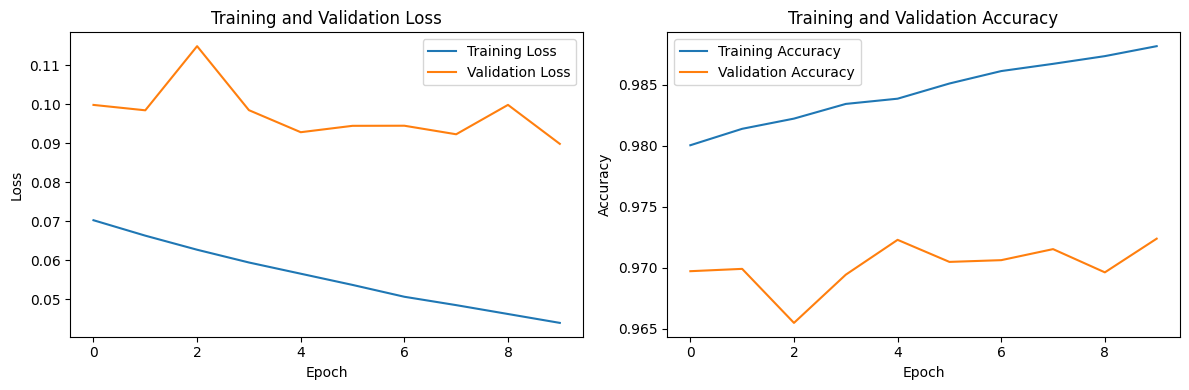

In [68]:
# f. Plot the training loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1. What is a neural network?
"A neural network is like a digital brain that learns from examples. Think of it as layers of connected nodes, similar to how neurons in our brain are connected. Here's a simple way to understand it:
- It takes input (like an image or numbers)
- Processes it through multiple layers
- Each layer learns different features
- Finally gives you an output (like a prediction)
For example, if you're teaching it to recognize cats, the first layer might learn edges, the next layer might learn shapes, and deeper layers might learn complex features like whiskers or ears."

2. What is a perceptron?
"A perceptron is the building block of neural networks - think of it as a single artificial neuron. Here's how it works:
- It takes multiple inputs (like a few numbers)
- Each input has a weight (importance)
- It combines these weighted inputs
- If the combined value crosses a threshold, it activates (outputs 1, otherwise 0)
It's like a simple decision-maker. For example, imagine deciding to carry an umbrella: you look at temperature (input 1) and cloud cover (input 2), give them importance (weights), and make a yes/no decision."

3. How to build models in Keras?
"Let me explain the simplest way to build a model in Keras:
```python
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
```
It's like building a layer cake:
- Start with the base layer (input)
- Add hidden layers in the middle
- Finish with the output layer
- Then compile it with optimizer and loss function
Each layer processes the data and passes it to the next layer."

4. What is feed forward?
"Feed forward is the basic way neural networks process information:
- Data flows in one direction only - from input to output
- Like a factory assembly line:
  * Input goes in at the start
  * Each layer processes it in sequence
  * Output comes out at the end
- No loops or going backward
- Information only moves forward through the network
For example, if you're recognizing a handwritten number, the image data moves forward through layers until the network makes its prediction."

5. What is SGD (Stochastic Gradient Descent)?
"SGD is a way for neural networks to learn. Here's a simple analogy:
- Imagine you're walking down a hill blindfolded
- You want to reach the bottom (the best solution)
- You feel the ground around you to find which way is down
- Take small steps in that direction
- Keep doing this until you can't go lower

In technical terms:
- Takes random samples of training data
- Calculates how wrong the predictions are
- Adjusts the network slightly to do better
- Repeats this process many times

It's like learning to cook:
- You taste the food (evaluate)
- Adjust ingredients slightly (update weights)
- Keep doing this until the taste is perfect (optimal solution)"

Additional Tips for Explaining:
1. Use lots of real-world analogies
2. Draw simple diagrams if possible
3. Start with basic concepts before complex ones
4. Encourage questions throughout
5. Use examples from everyday life
6. Break down complex terms into simpler language

